# 基于 K-means 的文本聚类

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy.stats import norm #使用直方图和最大似然高斯分布拟合绘制分布
import os
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

## 读取数据

In [3]:
def readData(subset):
    for root, dirs, files in os.walk("./20news-bydate-"+subset, topdown=False):
        for filename in files:
            print(os.path.join(root, filename))
            

In [4]:
readData("train")

./20news-bydate-train\alt.atheism\49960
./20news-bydate-train\alt.atheism\51060
./20news-bydate-train\alt.atheism\51119
./20news-bydate-train\alt.atheism\51120
./20news-bydate-train\alt.atheism\51121
./20news-bydate-train\alt.atheism\51122
./20news-bydate-train\alt.atheism\51123
./20news-bydate-train\alt.atheism\51124
./20news-bydate-train\alt.atheism\51125
./20news-bydate-train\alt.atheism\51126
./20news-bydate-train\alt.atheism\51127
./20news-bydate-train\alt.atheism\51128
./20news-bydate-train\alt.atheism\51130
./20news-bydate-train\alt.atheism\51131
./20news-bydate-train\alt.atheism\51132
./20news-bydate-train\alt.atheism\51133
./20news-bydate-train\alt.atheism\51134
./20news-bydate-train\alt.atheism\51135
./20news-bydate-train\alt.atheism\51136
./20news-bydate-train\alt.atheism\51139
./20news-bydate-train\alt.atheism\51140
./20news-bydate-train\alt.atheism\51141
./20news-bydate-train\alt.atheism\51142
./20news-bydate-train\alt.atheism\51143
./20news-bydate-train\alt.atheism\51144


In [5]:
labels = []
for root, dirs, files in os.walk("./20news-bydate-train", topdown=False):
    for dirname in dirs:
        labels.append(dirname)
labels        

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
train_root_path = "./20news-bydate-train"

data = []

for root, dirs, files in os.walk(train_root_path, topdown=False):
    for filename in files:
        one_data = []
#         print(filename)
        
        file_path = root+'/'+filename
        root = str(root)
        label = root.rsplit('\\')[-1]
        
        with open(file_path, 'rb') as f:
            content = f.read()

        one_data.append(content)
        one_data.append(label)
        data.append(one_data)



    
df = pd.DataFrame(data, columns=['content','label'])

df

content               label
0      b'From: mathew <mathew@mantis.co.uk>\nSubject:...         alt.atheism
1      b'From: mathew <mathew@mantis.co.uk>\nSubject:...         alt.atheism
2      b'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt ...         alt.atheism
3      b'From: mathew <mathew@mantis.co.uk>\nSubject:...         alt.atheism
4      b'From: strom@Watson.Ibm.Com (Rob Strom)\nSubj...         alt.atheism
...                                                  ...                 ...
11309  b"From: psyrobtw@ubvmsd.cc.buffalo.edu (Robert...  talk.religion.misc
11310  b"From: sandvik@newton.apple.com (Kent Sandvik...  talk.religion.misc
11311  b'From: sandvik@newton.apple.com (Kent Sandvik...  talk.religion.misc
11312  b"From: cutter@gloster.via.mind.org (cutter)\n...  talk.religion.misc
11313  b'Subject: Re: Albert Sabin\nFrom: rfox@charli...  talk.religion.misc

[11314 rows x 2 columns]

## 1. 数据预处理：去除停用词、数字、符号等，提取文本特征

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df.iloc[0].content

b'From: mathew <mathew@mantis.co.uk>\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".  It\'s a fish symbol, l

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform([str(df.iloc[0].content)])
print(X)

  (0, 828)	0.01898315991504998
  (0, 535)	0.01898315991504998
  (0, 697)	0.01898315991504998
  (0, 356)	0.01898315991504998
  (0, 331)	0.01898315991504998
  (0, 710)	0.01898315991504998
  (0, 721)	0.03796631983009996
  (0, 358)	0.01898315991504998
  (0, 538)	0.01898315991504998
  (0, 290)	0.01898315991504998
  (0, 115)	0.01898315991504998
  (0, 428)	0.01898315991504998
  (0, 463)	0.01898315991504998
  (0, 170)	0.01898315991504998
  (0, 723)	0.03796631983009996
  (0, 410)	0.056949479745149946
  (0, 733)	0.01898315991504998
  (0, 579)	0.01898315991504998
  (0, 515)	0.01898315991504998
  (0, 264)	0.01898315991504998
  (0, 749)	0.01898315991504998
  (0, 144)	0.01898315991504998
  (0, 426)	0.01898315991504998
  (0, 191)	0.01898315991504998
  (0, 493)	0.01898315991504998
  :	:
  (0, 15)	0.01898315991504998
  (0, 55)	0.01898315991504998
  (0, 5)	0.03796631983009996
  (0, 24)	0.01898315991504998
  (0, 110)	0.01898315991504998
  (0, 36)	0.01898315991504998
  (0, 772)	0.01898315991504998
  (0, 5

In [10]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [12]:
newsgroups_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [13]:
vectorizer.get_feature_names_out()

array(['00', '000', '01', ..., 'young', 'zip', 'zone'], dtype=object)

In [15]:
vectorizer.get_feature_names_out()

array(['00', '000', '01', ..., 'young', 'zip', 'zone'], dtype=object)

In [16]:
text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [17]:
my_stop_words = []
for word in text.ENGLISH_STOP_WORDS:
    my_stop_words.append(word)


In [18]:
new_stop_words = ['00', '000', '01', '02', '03', '04', '0d', '0t', '10', '100', '11',
       '12', '13', '14', '145', '15', '16', '17', '18', '19', '1992',
       '1993', '1993apr15', '1d9', '1t', '20', '200', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2di', '2tm', '30', '31', '32',
       '33', '34', '34u', '35', '36', '37', '38', '39', '3d', '3t', '40',
       '408', '41', '42', '43', '44', '45', '46', '48', '49', '50', '500',
       '51', '55', '60', '70', '75', '75u', '80', '800', '90', '91', '92',
       '93', '__', '___', 'a86','300', '6ei', '6um', '7ey', '86', '_o']

my_stop_words = my_stop_words + new_stop_words



In [65]:
vectorizer = TfidfVectorizer(stop_words=my_stop_words)
vectors = vectorizer.fit_transform(newsgroups_train.data)
idf_values = dict(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))
print(vectorizer.vocabulary_)

{'lerxst': 75064, 'wam': 122735, 'umd': 117861, 'thing': 114287, 'car': 37573, 'nntp': 87300, 'posting': 94811, 'host': 63819, 'rac3': 98597, 'organization': 90041, 'university': 118562, 'maryland': 79368, 'college': 40790, 'park': 91734, 'lines': 75737, 'wondering': 124475, 'enlighten': 51563, 'saw': 104458, 'day': 45082, 'door': 48400, 'sports': 109203, 'looked': 76423, 'late': 74401, '60s': 16470, 'early': 49889, '70s': 18185, 'called': 37229, 'bricklin': 34794, 'doors': 48402, 'really': 99468, 'small': 107882, 'addition': 25921, 'bumper': 35411, 'separate': 105756, 'rest': 101024, 'body': 33982, 'know': 72910, 'tellme': 113603, 'model': 82952, 'engine': 51500, 'specs': 108893, 'years': 127569, 'production': 95793, 'history': 63087, 'info': 66872, 'funky': 57052, 'looking': 76427, 'mail': 78658, 'thanks': 114043, 'il': 65817, 'brought': 34986, 'neighborhood': 86265, 'guykuo': 60733, 'carson': 37753, 'washington': 122877, 'guy': 60730, 'kuo': 73532, 'si': 106841, 'clock': 40270, 'pol

In [66]:
len(vectorizer.get_feature_names_out())

129644

In [67]:
print(vectors.shape)

(11314, 129644)


In [22]:
vectorizer.get_feature_names_out()

array(['0000', '00000', '000000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

In [23]:
for i in vectorizer.get_feature_names_out():
    print(i)

0000
00000
000000
00000000
0000000004
0000000005
00000000b
00000001
00000001b
0000000667
00000010
00000010b
00000011
00000011b
0000001200
00000074
00000093
000000e5
00000100
00000100b
00000101
00000101b
00000110
00000110b
00000111
00000111b
00000315
000005102000
00000510200001
000007
00000ee5
00001000
00001000b
00001001
00001001b
00001010
00001010b
00001011
00001011b
000010af
00001100
00001100b
00001101
00001101b
00001110
00001110b
00001111
00001111b
000021
000042
000062david42
000094
0000vec
0001
00010000
00010000b
00010001
00010001b
00010010
00010010b
00010011
00010011b
000100255pixel
00010100
00010100b
00010101
00010101b
00010110
00010110b
00010111
00010111b
00011000
00011000b
00011001
00011001b
00011010
00011010b
00011011
00011011b
00011100
00011100b
00011101
00011101b
00011110
00011110b
00011111
00011111b
00014
000152
0001mpc
0001x7c
0002
000246
000256
0003
000359
0004
000406
00041032
000413
0004136
0004246
0004422
00044513
0004847546
0005
0005111312
0005111312na1em
0005111312na3e

jei
jei5
jej
jejones
jek
jek5036
jekyll
jel
jel4
jele
jelee
jelinek
jelloman
jelly
jelson
jeltz
jem
jemaleddin
jemartin
jemison
jemurray
jen
jen187
jena
jender
jenk
jenkinch
jenkins
jenkinsc
jenks
jenner
jennet
jenni
jennies
jennifer
jennings
jennise
jenny
jennya
jens
jensen
jenski
jensvold
jeo
jeopardize
jeopardy
jeos
jepardy
jeq
jeqz_
jer
jer108
jer114
jer4
jerald
jere
jeremi
jeremiah
jeremy
jeremy_roenick
jerger
jericho
jerj7
jerk
jerked
jerking
jerkius
jerks
jerky
jermey
jeroen
jeroeng
jerome
jerry
jerryb
jersey
jerseys
jersualem
jersusalem
jerusalem
jerusaleum
jeruselem
jeruseleum
jeruselum
jesper
jess
jesse
jessea
jessel
jessie
jessy
jest
jester
jesting
jesuit
jesuitic
jesuitical
jesuits
jesup
jesus
jet
jetfighter
jethro
jets
jetski
jetskis
jetson
jetsun
jetta
jettas
jetted
jetting
jettison
jettisoned
jetzt
jeu
jevgrf
jew
jewel
jewelry
jewelrys
jewels
jewish
jewishistory
jewishness
jewlal
jewry
jews
jews_
jex
jey6
jeyasingh
jeykhun
jf
jf4
jf4527
jf4f
jf5
jf8tvx
jf_
jfare
jfb
jfc


maritime
maritimes
mariusz
mark
mark_lamb
mark_messier
mark_muhlestein
mark_pederson
mark_recchi
mark_tinordi
marka
markb
markbr
markc
markd
marked
markedly
markell
marker
markers
market
marketable
marketed
marketeer
marketeers
marketer
marketing
marketplace
markets
markey
markh
markham
markhof
marking
markings
markk
markku
markl
markm
markmc
marko
markoff
markov
markowitz
markp
marks
marksa
marksistskaja
marksmanship
markspace
marktoday
marktomorrow
markup
markus
markv
markyesterday
markz
marlan
marlboro
marlborough
marlena
marlene
marlenee
marler
marley
marlin
marline
marlines
marlington
marlins
marlow
marly
marmet
marmora
marois
maroni
maronite
marouelli
marovac
marque
marquee
marquees
marques
marquette
marquis
marr
marraige
marred
marrette
marrevola
marriage
marriages
married
marries
marriing
marriott
marrital
marrou
marrow
marry
marrying
mars
marsalis
marsden
marseilles
marsh
marshal
marshalk
marshall
marshalled
marshalls
marshals
marshatt
marsico
marsolais
marsquake
mart
mart4678

In [68]:
print(vectors.nnz / float(vectors.shape[0]))

109.29512108891639


In [64]:
vectors.shape

(11314, 112)

129712维向量，只有112个非零数值，所以特征max_feature不能太大，而且在其中的特征还有很多都是没有意义的表征，例如
0_s63
0_ynu5
0_zs

In [25]:
my_stop_words = my_stop_words + ['05','06','128','130','150','1988','1990','1991','1993apr14','1993apr16','1993apr19','1993apr20','1993apr5',
'1993apr6','1st','2000','241','250','256','2nd','386','3rd','400','47','486','52','53','54','56','57','58','59','5u','600','61','63','64','65','66','68','71','72','73','74','76',
'77','78','79','7u','81',
'82','84','85','88',
'89','95','99','9v','____','_____','ab','07','08','1000','67']
vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=2000)
vectors = vectorizer.fit_transform(newsgroups_train.data)

for i in vectorizer.get_feature_names_out():
    print('\''+i+'\',')

'ability',
'able',
'absolute',
'absolutely',
'ac',
'academic',
'accept',
'accepted',
'access',
'according',
'account',
'accurate',
'acs',
'act',
'action',
'actions',
'activities',
'activity',
'acts',
'actual',
'actually',
'ad',
'adam',
'adams',
'add',
'added',
'addition',
'additional',
'address',
'administration',
'admit',
'adobe',
'advance',
'advanced',
'advantage',
'advice',
'afraid',
'age',
'agencies',
'agency',
'ago',
'agree',
'ah',
'ahead',
'ai',
'aids',
'air',
'al',
'alan',
'alaska',
'algorithm',
'alive',
'allen',
'allow',
'allowed',
'allows',
'alt',
'alternative',
'amendment',
'america',
'american',
'americans',
'amiga',
'analysis',
'andrew',
'andy',
'angeles',
'animals',
'announced',
'announcement',
'anonymous',
'answer',
'answers',
'anti',
'anybody',
'apartment',
'app',
'apparently',
'appear',
'appears',
'apple',
'application',
'applications',
'applied',
'apply',
'appreciate',
'appreciated',
'approach',
'appropriate',
'apr',
'april',
'arab',
'arabs',
'archive',
'area',
'areas'

将最大特征的词库为1000时，大部分的单词都是有意义的

## 2 K-means

In [26]:
from sklearn.cluster import KMeans

在这个数据集当中，因为新闻已经分为20个组，所以我们使用的K应该也是20

 即初始值（质心）选择的方式：'k-means++'<br>
 n_init : （用不同的初始化之心运行计算的次数）k-means算法会随机运行n_init次，最终的结果将是最好的一个聚类结果，默认10<br>
 n_clusters : k值，聚类中心数量（开始时需要产生的聚类中心数量），默认为8

In [27]:
# 建立文本聚类模型
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, verbose=0)

In [28]:
# 训练模型
model.fit(vectors)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [29]:
# 聚类结果展示
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [30]:
for i in range(k):
    print("Cluster %d:" % (i+1))
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 1:
 berkeley
 edu
 california
 posting
 nntp
 host
 msg
 article
 like
 writes
Cluster 2:
 nasa
 gov
 space
 jpl
 fnal
 center
 research
 orbit
 article
 writes
Cluster 3:
 drive
 scsi
 ide
 controller
 drives
 hard
 disk
 floppy
 edu
 bus
Cluster 4:
 edu
 university
 lines
 subject
 organization
 posting
 host
 nntp
 thanks
 cs
Cluster 5:
 cmu
 andrew
 carnegie
 mellon
 edu
 pittsburgh
 pa
 host
 nntp
 posting
Cluster 6:
 god
 jesus
 christians
 bible
 christian
 people
 christ
 edu
 faith
 church
Cluster 7:
 harvard
 edu
 adam
 article
 writes
 david
 center
 drugs
 israel
 organization
Cluster 8:
 ca
 canada
 bnr
 bc
 subject
 organization
 university
 lines
 writes
 article
Cluster 9:
 key
 keys
 chip
 escrow
 clipper
 des
 bit
 nsa
 public
 bits
Cluster 10:
 com
 article
 subject
 hp
 lines
 organization
 writes
 posting
 edu
 nntp
Cluster 11:
 team
 game
 edu
 players
 year
 games
 hockey
 season
 baseball
 play
Cluster 12:
 netcom
 com
 guest
 services
 communication
 on

发现前10的词都有edu，应该删除这个重新聚类

In [55]:
my_stop_words = my_stop_words + ['edu','com','subject']

In [79]:
vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=100)
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectorizer.get_feature_names_out()

array(['access', 'article', 'available', 'ax', 'believe', 'best',
       'better', 'bit', 'ca', 'case', 'cc', 'come', 'computer', 'cs',
       'data', 'david', 'day', 'did', 'didn', 'distribution', 'does',
       'doesn', 'don', 'drive', 'fact', 'file', 'god', 'going', 'good',
       'got', 'gov', 'government', 'help', 'host', 'information', 'john',
       'just', 'key', 'know', 'law', 'let', 'like', 'lines', 'little',
       'll', 'long', 'look', 'mail', 'make', 'max', 'nasa', 'need', 'new',
       'news', 'nntp', 'number', 'org', 'organization', 'people', 'point',
       'posting', 'power', 'probably', 'problem', 'program', 'public',
       'question', 'read', 'really', 'reply', 'right', 'said', 'say',
       'science', 'software', 'space', 'state', 'sure', 'thanks', 'thing',
       'things', 'think', 'time', 'true', 'uk', 'university', 'usa',
       'use', 'used', 'using', 've', 'version', 'want', 'way', 'windows',
       'work', 'world', 'writes', 'year', 'years'], dtype=object)

In [80]:
# 建立文本聚类模型
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, verbose=0)
# 训练模型
model.fit(vectors)
# 聚类结果展示
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % (i+1))
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind])

Cluster 1:
 john
 article
 writes
 organization
 lines
Cluster 2:
 host
 posting
 nntp
 organization
 lines
Cluster 3:
 year
 good
 lines
 organization
 article
Cluster 4:
 ca
 writes
 article
 organization
 lines
Cluster 5:
 people
 government
 don
 writes
 think
Cluster 6:
 cs
 writes
 article
 science
 computer
Cluster 7:
 lines
 organization
 university
 thanks
 state
Cluster 8:
 writes
 article
 don
 just
 like
Cluster 9:
 cc
 org
 writes
 article
 lines
Cluster 10:
 uk
 writes
 lines
 organization
 article
Cluster 11:
 god
 people
 believe
 think
 does
Cluster 12:
 space
 nasa
 organization
 just
 lines
Cluster 13:
 access
 public
 organization
 lines
 world
Cluster 14:
 key
 public
 use
 bit
 government
Cluster 15:
 windows
 version
 using
 thanks
 lines
Cluster 16:
 drive
 lines
 organization
 problem
 university
Cluster 17:
 gov
 nasa
 writes
 article
 lines
Cluster 18:
 file
 windows
 program
 lines
 organization
Cluster 19:
 use
 using
 lines
 used
 organization
Cluster 20:


## 3 评价指标

In [81]:
y=model.predict(vectors)
y

array([ 1,  1,  7, ...,  6, 11,  1])

In [35]:
len(y)

11314

### 轮廓系数

轮廓系数的取值在[-1,1]之间，越趋近于1代表内聚度和分离度都相对较优，即聚类效果越好

In [82]:
from sklearn import metrics
sc=metrics.silhouette_score(vectors,y)
sc

0.07458074940048388

轮廓系数接近于0时表示有簇重叠

### CH

CH指标是数据集的分离度与紧密度的比值，以各类中心点与数据集的中心点的距离平方和来度量数据集的分离度，以类内各点与其类中心的距离平方和来度量数据的紧密度。聚类效果越好，类间差距应该越大，类内差距越小，即类自身越紧密，类间越分散，CH指标值越大聚类效果越好

In [83]:
#CH
ch = metrics.calinski_harabasz_score(vectors.toarray() ,y)
ch

166.7518233275129

修改max_feature计算SC和CH

In [75]:
result = []
def evaluation(max_feature):
    for feature in max_feature:
        # 向量化
        
        vectorizer = TfidfVectorizer(stop_words=my_stop_words, max_features=feature)
        vectors = vectorizer.fit_transform(newsgroups_train.data)

        # Kmeans
        # 建立文本聚类模型
        k = 20
        model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, verbose=0)
        # 训练模型
        model.fit(vectors)
        # 聚类结果展示
        order_centroids = model.cluster_centers_.argsort()[:, ::-1]
        terms = vectorizer.get_feature_names_out()
        y=model.predict(vectors)
        sc=metrics.silhouette_score(vectors,y)
        ch = metrics.calinski_harabasz_score(vectors.toarray() ,y)
        one_result = []
        one_result.append(feature)
        one_result.append(sc)
        one_result.append(ch)
        
        result.append(one_result)

In [76]:
max_feature = [5, 10, 15, 20, 50, 100, 112,200, 300, 400, 500, 1000, 2000]
evaluation(max_feature)
evaluation_df = pd.DataFrame(result)
evaluation_df.columns = ['max_features','SC','CH']
evaluation_df

max_features        SC            CH
0              5  0.917077  63182.645216
1             10  0.394213   2065.092430
2             15  0.243414   1171.513440
3             20  0.176875    735.920090
4             50  0.095802    268.063722
5            100  0.070376    164.120212
6            112  0.068662    154.610541
7            200  0.051948    109.523081
8            300  0.041128     85.046659
9            400  0.032026     69.665294
10           500  0.032076     63.958093
11          1000  0.022280     47.351250
12          2000  0.017029     35.514360

## 4 结果可视化

### 降维

In [40]:
from sklearn.decomposition import PCA

In [41]:
vectors.dtype

dtype('float64')

In [42]:
vectors

<11314x112 sparse matrix of type '<class 'numpy.float64'>'
	with 197504 stored elements in Compressed Sparse Row format>

In [43]:
pca = PCA(n_components=3)
new_vectors = pca.fit_transform(vectors.toarray())
new_vectors.shape

(11314, 3)

tsne.embedding_: 
 [[-20.28145     -0.37691855]
 [-11.636884    -7.1987486 ]
 [-16.538399    20.759464  ]
 ...
 [ 16.170332    -2.7005072 ]
 [-49.269787   -47.69616   ]
 [ 38.1591      -2.8393645 ]]
tsne: 
 TSNE()
shape:  11314


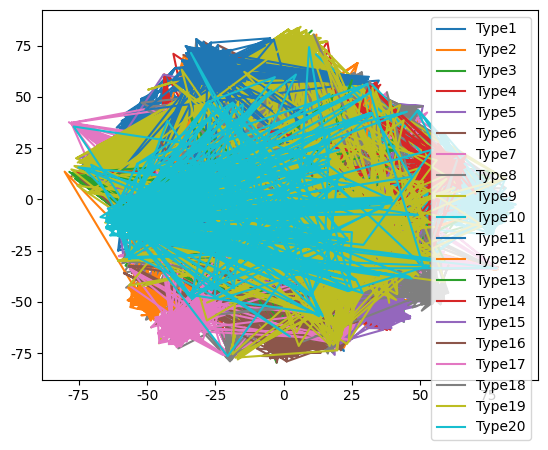

In [84]:
# 使用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne.fit_transform(vectors.toarray())  # 进行数据降维
# tsne.embedding_可以获得降维后的数据
print('tsne.embedding_: \n', tsne.embedding_)
tsn = pd.DataFrame(tsne.embedding_)  # 转换数据格式
output_data = pd.concat([tsn, pd.Series(model.labels_)], axis=1) 
output_data.columns =  ['x1','x2','Type']  # 重命名表头
print('tsne: \n', tsne)
print('shape: ',len(tsne.embedding_))
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 不同类别用不同颜色和样式绘图
# color_style = ['r.', 'go', 'b*']
for i in range(k):
    d = tsn[output_data[u'Type'] == i]
    # dataframe格式的数据经过切片之后可以通过d[i]来得到第i列数据
    plt.plot(d[0], d[1],label='Type' + str(i+1))
plt.legend()
plt.show()

In [45]:
newsgroups_train.data.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

tsne.embedding_: 
 [[ 21.013111     2.8849196   -0.07045638]
 [  5.9368367    8.319429     9.54572   ]
 [ -9.528159    22.964622     2.3306658 ]
 ...
 [  3.4750254  -10.331948   -15.0567465 ]
 [ -2.0547647   -8.496058    30.552603  ]
 [-14.724392   -20.18808     -7.281328  ]]
tsne: 
 TSNE(n_components=3)


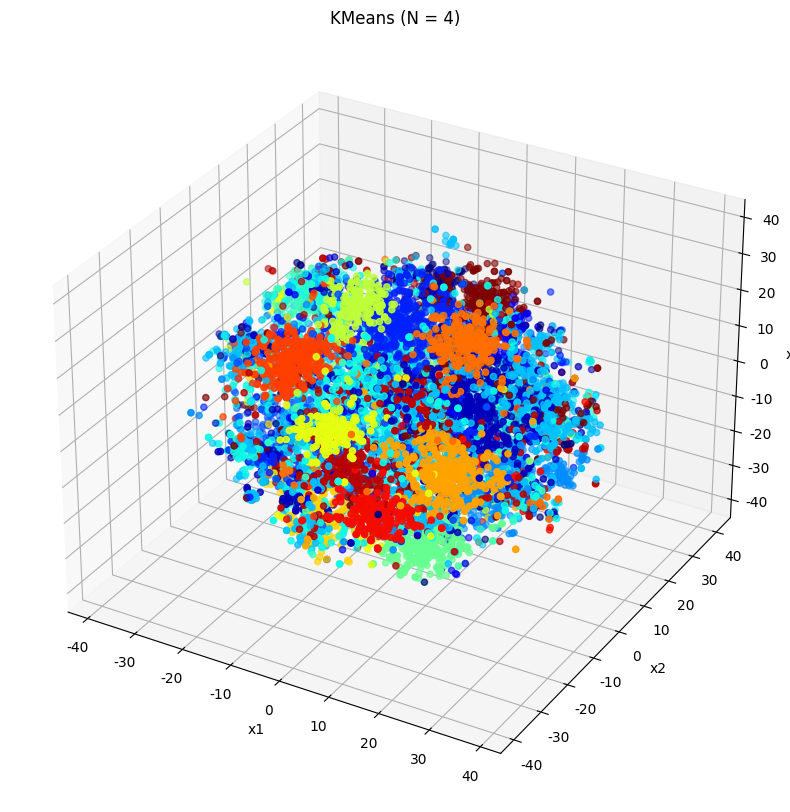

In [85]:
# 使用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
tsne.fit_transform(vectors.toarray())  # 进行数据降维
# tsne.embedding_可以获得降维后的数据
print('tsne.embedding_: \n', tsne.embedding_)
tsn = pd.DataFrame(tsne.embedding_)  # 转换数据格式
output_data = pd.concat([tsn, pd.Series(model.labels_)], axis=1) 
output_data.columns =  ['x1','x2','x3','Type']  # 重命名表头
print('tsne: \n', tsne)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
x = output_data['x1']
y = output_data['x2']
z = output_data['x3']
ax.scatter(x, y, z,c =model.labels_ , cmap="jet", marker="o")
plt.title("KMeans (N = 4)");
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()
